## Численные начальные данные

In [3]:
import numpy as np
import math as mh
import matplotlib.pyplot as plt

In [219]:
gamma_0 = 5/3
rho_0 = 2.71*10**(-3)
P_0 = 5*10**5
U_0 = 0
gamma_3 = 7/5
rho_3 = 2.219*10**(-4)
U_3 = 1.587*10**5
P_3 = 10**6


## Запишем формулы коэффициентов


In [220]:
alpha_3 = (gamma_3 + 1)/(gamma_3 - 1)
alpha_0 = (gamma_0 + 1)/(gamma_0 - 1)
# Y = P_1 / P_0
X = P_3 / P_0
C_3 = np.sqrt(gamma_3 * P_3 / rho_3)
C_0 = np.sqrt(gamma_0 * P_0 / rho_0)
e_0 = (2 * C_0**2) / (gamma_0 * (gamma_0 - 1) * (U_3 - U_0)**2)
e_3 = (2 * C_3**2) / (gamma_3 * (gamma_3 - 1) * (U_3 - U_0)**2)

In [221]:
a_0 = (alpha_0 * e_3 - alpha_3 * X * e_0)**2
a_0

10.988714503099754

In [276]:
a_1 = 2 *((alpha_0 * e_3 - alpha_3 * X * e_0)*(e_3*(1-2*alpha_0*X) - e_0*X*(X-2*alpha_3)) - alpha_0*alpha_3*X*(alpha_0 * e_3 + alpha_3 * X * e_0))

a_1

-454.9255413345035

In [223]:
a_2 = e_3**2 * (6*alpha_0**2 * X**2 - 8*alpha_0*X + 1)-2*e_0*e_3*X*(alpha_0*alpha_3*(X**2+4*X+1)-2*(X+1)*(alpha_3+alpha_0*X)+X) +e_0**2*X**2*(6*alpha_3**2-8*alpha_3*X+X**2)+alpha_0**2*alpha_3**2*X**2 -2*alpha_0*X*e_3*(alpha_0*X-2*alpha_0*alpha_3*X+2*alpha_3) -2*alpha_3*X**2*e_0*(alpha_3+2*alpha_0*X-2*alpha_0*alpha_3)
a_2

3658.4211451613614

In [224]:
a_3 = -2*X*(2*e_3**2*(alpha_0**2*X**2-3*alpha_0*X+1)+e_0*e_3*((alpha_3+
            alpha_0*X)*(X**2+4*X+1)-2*alpha_0*alpha_3*X*(X+1)-2*X*(X+1))+
           2*e_0**2*X*(X**2-3*alpha_3*X+alpha_3**2)-alpha_0*alpha_3*X*(alpha_0*X+alpha_3)+
           e_3*(alpha_0**2*alpha_3*X**2-2*X*(2*alpha_0*alpha_3+alpha_0**2*X)+(2*alpha_0*X+alpha_3))+
           e_0*X*(alpha_0*alpha_3**2-2*alpha_3*(alpha_3+2*alpha_0*X)+2*alpha_3*X+alpha_0*X**2))
a_3

2141.0135627426307

In [225]:
a_4 = X**2*(e_3**2*(alpha_0**2*X**2-8*alpha_0*X+6)-
           2*e_0*e_3*(alpha_0*alpha_3*X-2*(X+1)*(alpha_3+alpha_0*X)+X**2+4*X+1)+
           e_0**2*(alpha_3**2-8*alpha_3*X+6*X**2)+(alpha_3**2+4*alpha_0*alpha_3*X+alpha_0**2*X**2)-
           2*e_3*((alpha_0**2*X+2*alpha_0*alpha_3)*X-2*(2*alpha_0*X+alpha_3)+1)-
           2*e_0*(alpha_3*(2*alpha_0*X+alpha_3)-2*X*(2*alpha_3+alpha_0*X)+X**2))
a_4

343.5092754084322

In [226]:
a_5 = 2*X**3*(e_3**2*(alpha_0*X-2)-e_0*e_3*(alpha_0*X-2+alpha_3-2*X)+
             e_0**2*(alpha_3-2*X)+(alpha_3+alpha_0*X)-
             e_3*(2*alpha_0*X+alpha_3-2)-e_0*(2*alpha_3+alpha_0*X-2*X))
a_5

6.421148304155288

In [227]:
a_6 = X**4*((e_3-e_0)**2+1-2*(e_3+e_0))
a_6

-1.147180163387823

In [228]:
koef = np.array((a_0,a_1,a_2,a_3,a_4,a_5,a_6))
koef 


array([ 1.09887145e+01, -4.54925541e+02,  3.65842115e+03,  2.14101356e+03,
        3.43509275e+02,  6.42114830e+00, -1.14718016e+00])

## Оценим кольцо корней по ф-ле: $\frac{|a_n|}{|a_n|+B} \leq |z| \leq 1 + \frac{A}{|a_0|}$,
где $A = max\left\{ |a_1|, |a_2|, ..., |a_n| \right\}$ и $B = max\left\{ |a_0|, |a_1|, ..., |a_{n-1}| \right\}$

In [229]:
A = max(koef[1:])
A

3658.4211451613614

In [230]:
B = max(koef[:5:])
B

3658.4211451613614

In [231]:
left = (abs(koef[6]))/(abs(koef[6])+B)
left

0.0003134741754783393

In [232]:
for i in range(len(koef)):
    if koef[i] != 0:
        right = 1 + A/(abs(koef[i]))
right

3190.055443878498

## Корни лежат в кольце $4.7 \cdot 10^{-5} \leq |z| \leq 1012.9$

In [233]:
def func(Y, a_0, a_1, a_2, a_3, a_4, a_5, a_6):
    return a_0*Y**6+a_1*Y**5+a_2*Y**4+a_3*Y**3+a_4*Y**2+a_5*Y+a_6
    

In [234]:
def sign(x):
    if x >= 0:
        return 1
    elif x < 0:
        return 0


In [235]:
length = right - left
length

3190.0551304043224

In [239]:
N = 10000000
T = length / N
T


0.00031900551304043227

### Положительный корень

In [240]:
il = []
for i in range(N-1):
    if sign(func(left + i*T, *koef)) != sign(func(left + (i+1)*T, *koef)):
        il.append(i)
    if len(il) == 3:
            break
il

[137, 37052, 94468]

In [241]:
y = []
for i in range(len(il)):
    y.append((2*left+(2*il[i]+1)*T)/2)
y

[0.044176732218537774, 11.820265246106095, 30.136285782835554]

In [242]:
#positive
for i in range(len(il)):
    print('Значение функции слева и справа F(Y) = %f  F(Y) = %f'%(func(left + il[i]*T, *koef), func(left + (il[i]+1)*T, *koef)))
    print('Y_%d = %f локализовано в  [%f, %f] \n\n' %(i+1,(2*left+(2*il[i]+1)*T)/2, left + il[i]*T, left + (il[i]+1)*T) )



Значение функции слева и справа F(Y) = -0.002731  F(Y) = 0.013398
Y_1 = 0.044177 локализовано в  [0.044017, 0.044336] 


Значение функции слева и справа F(Y) = 701.938610  F(Y) = -611.336454
Y_2 = 11.820265 локализовано в  [11.820106, 11.820425] 


Значение функции слева и справа F(Y) = -42352.856444  F(Y) = 11589.119194
Y_3 = 30.136286 локализовано в  [30.136126, 30.136445] 




### Отрицательный корень

In [243]:
il_n = []
for i in range(N-1):
    if sign(func(-left - i*T, *koef)) != sign(func(-left - (i+1)*T, *koef)):
        il_n.append(i)
    if len(il_n) == 1:
            break
il_n

[344]

In [244]:
#negative
for i in range(len(il_n)):
    print('Значение функции слева и справа F(Y) = %f  F(Y) = %f'%(func(-left - il_n[i]*T, *koef), func(-left - (il_n[i]+1)*T, *koef)))
    print('Y_%d = %f локализовано в  [%f, %f] \n\n' %(i+1,-(2*left+(2*il_n[i]+1)*T)/2, -left - il_n[i]*T, -left - (il_n[i]+1)*T) )


Значение функции слева и справа F(Y) = -0.003180  F(Y) = 0.000394
Y_1 = -0.110211 локализовано в  [-0.110051, -0.110370] 




## График 

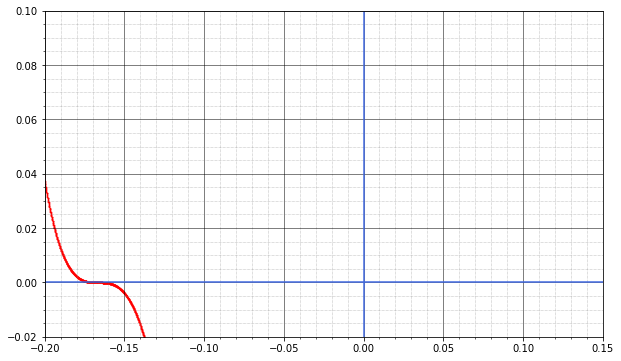

In [185]:
fig, ax = plt.subplots(figsize=(10, 6))
dots = np.arange(-0.3, 0.2, 0.0001)
ax.scatter(dots, func(dots, *koef), color = 'red', s = 0.5)
ax.plot([0,0], [-1,1], color = 'royalblue')
ax.plot([-1,1], [0,0], color = 'royalblue')
ax.grid(which='major',color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)
ax.grid(which='major', linewidth = 0.5)

plt.xlim (-0.2, 0.15)
plt.ylim (-0.02, 0.1)
plt.savefig('plot.png', dpi=400, quality=100)
plt.show()

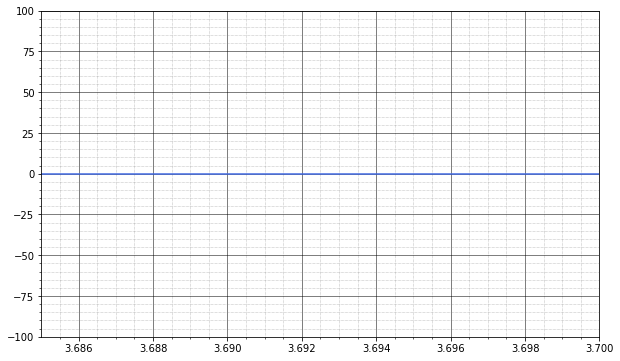

In [186]:
fig, ax = plt.subplots(figsize=(10, 6))
dots = np.arange(3.686, 3.7, 0.00001)
ax.scatter(dots, func(dots, *koef), color = 'red', s = 3)
ax.plot([0,0], [-100,100], color = 'royalblue')
ax.plot([-100,100], [0,0], color = 'royalblue')
ax.grid(which='major',color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)
ax.grid(which='major', linewidth = 0.5)

plt.xlim (3.685, 3.7)
plt.ylim (-100, 100)
plt.savefig('plot-2.png', dpi=400, quality=100)
plt.show()

In [187]:
# fig, ax = plt.subplots(figsize=(10, 6))
# dots = np.arange(290.13, 290.14, 0.000000000001)
# ax.scatter(dots, func(dots, *koef), color = 'red', s = 3)
# ax.plot([0,0], [-100,100], color = 'royalblue')
# ax.plot([-100,100], [0,0], color = 'royalblue')
# ax.grid(which='major',color = 'k')

# ax.minorticks_on()

# ax.grid(which='minor',
# color = 'gray',
# linestyle = ':', linewidth = 0.5)
# ax.grid(which='major', linewidth = 0.5)

# plt.xlim (290.13, 290.14)
# plt.ylim (-1, 100)
# plt.savefig('plot-2.png', dpi=400, quality=100)
# plt.show()

In [245]:
P_1 = []
for i in range(len(y)):
    P_1.append(P_0 * y[i]) 
P_1
# print(r'$P_1$ = %f (дин/см^2)' %(P_1) )

[22088.36610926889, 5910132.623053047, 15068142.891417777]

In [246]:
rho_1 = []
for i in range(len(P_1)):
    rho_1.append(rho_0 * ((gamma_0 - 1)+(gamma_0+1)*P_1[i]/P_0)/((gamma_0+1)+(gamma_0-1)*P_1[i]/P_0)) 
rho_1

# print('rho_1 = %f (г/см^3)'%(rho_1))

[0.0007885104901188652, 0.008270510843678469, 0.009649185033819946]

In [247]:
# rho_2 = rho_1 #это не точно))
P_2 = P_1

In [273]:
# D_0 = []
# for i in range(len(P_1)):
#     D_0.append(U_0 + np.sqrt((P_0 - P_1[i])/(rho_0**2/rho_1[i] - rho_0)))

# D_0

[8506.950088472271, 54491.42082650751, 86458.66673496696]

In [275]:
D_0 = []
for i in range(len(P_1)):
    D_0.append((rho_1[i]*U_1[i] - rho_0*U_0)/(rho_1[i]-rho_0))

D_0

[-8506.950088472271, 54491.4208265075, -86458.66673496694]

In [268]:
U_1 = []
for i in range(len(P_1)):
     U_1.append(U_0  + (-1)**k_u1[i] * (P_1[i]-P_0)/(rho_0*C_0*np.sqrt(((gamma_0-1)+(gamma_0+1)*P_1[i]/P_0)/(2*gamma_0))))
U_1

[20730.244633293027, 36636.20568550957, -62176.51378313326]

In [269]:
U_2 = []
for i in range(len(P_1)):
    U_2.append(U_3 + (-1)**k_u2[i] * (P_2[i]-P_3)/(rho_3*C_3*np.sqrt(((gamma_3-1)+(gamma_3+1)*P_2[i]/P_3)/(2*gamma_3))))
# U_2[0] = -U_2[0]

U_2

[20762.907132696768, 36636.307828075835, -62176.2304309537]

In [270]:
sign_U_1 = ['-', '+', '-']
k_u1 = [1,2,1]
sign_U_2 = ['+', '-', '-']
k_u2 = [2,1,1]

In [271]:
D_3 = []
for i in range(len(P_1)):
    D_3.append((U_3*U_2[i]-(U_3)**2-(P_3-P_2[i])/rho_3)/(U_2[i]-U_3))
D_3

[190649.2922462902, -22579.801952811966, -128332.11212697875]

In [274]:
rho_2 = []
for i in range(len(P_1)):
    rho_2.append((U_3-D_3[i])*rho_3/(U_2[i]-D_3[i]))
rho_2

[4.173111308897069e-05, 0.000679308184920855, 0.0009627628571807473]

In [34]:
N = 10000
T = length/N
while 1:
    il = []
    for i in range(N-1):
        if sign(func(left + i*T, *koef)) != sign(func(left + (i+1)*T, *koef)):
            il.append(i)
        if len(il) == 3:
            break
    if len(il) < 3:
        N *=2
    else:
        break
print(il)

[0, 36, 2864]
